In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# 하이퍼파라미터로 사용할 옵션들 추가
learning_rate = 0.01  # 최적화 함수에 사용할 학습률
training_epoch = 20 # 전체 데이터를 학습할 총횟수
batch_size = 100 # 미니배치로 한 번에 학습할 데이터
n_hidden = 256  # 은닉층의 뉴런 개수
n_input = 28*28 # 입력값의 크기  -> 784

In [14]:
# 신경망 모델 구성
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 만들기

W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))  # n_hidden개의 뉴런을 가진 은닉층 생성, 인풋값보다 히든값이 더 작다. 이렇게 하면 입력값을 압축하고 노이즈를 제거하면서 입력값의 특징을 찾아내게 된다.
b_encode = tf.Variable(tf.random_normal([n_hidden]))

# 가중치와 편향 변수를 원하는 뉴런의 개수만큼 설정하고, 그 변수들을 입력값과 곱하고 더한 뒤, 

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode)) # 활성함수인 시그모이드 함수를 적용

In [15]:
# 디코더 생성
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode)) 
# 입력값을 은닉층의 크기로, 출력값을 입력층의 크기로 만들었다.

#입력층(784) -> 은닉층(256) -> 출력층(784)

In [16]:
# 입력값 x 를 평가하기 위한 실측값, 디코더가 내보낸 결괏값과의 차이를 손실값으로 설정. => 이 값의 차이는 거리함수로.
cost = tf.reduce_mean(tf.pow(X - decoder, 2))

In [17]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
# 항상 쓰이는 학습 진행 코드
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.1953
Epoch: 0002 Avg. cost = 0.0625
Epoch: 0003 Avg. cost = 0.0529
Epoch: 0004 Avg. cost = 0.0494
Epoch: 0005 Avg. cost = 0.0450
Epoch: 0006 Avg. cost = 0.0430
Epoch: 0007 Avg. cost = 0.0413
Epoch: 0008 Avg. cost = 0.0403
Epoch: 0009 Avg. cost = 0.0386
Epoch: 0010 Avg. cost = 0.0381
Epoch: 0011 Avg. cost = 0.0372
Epoch: 0012 Avg. cost = 0.0369
Epoch: 0013 Avg. cost = 0.0366
Epoch: 0014 Avg. cost = 0.0364
Epoch: 0015 Avg. cost = 0.0363
Epoch: 0016 Avg. cost = 0.0361
Epoch: 0017 Avg. cost = 0.0357
Epoch: 0018 Avg. cost = 0.0356
Epoch: 0019 Avg. cost = 0.0354
Epoch: 0020 Avg. cost = 0.0352
최적화 완료!


In [19]:
# 결괏값을 정확도가 아닌, 디코더로 생성해낸 결과를 직관적인 방법으로 확인.

# 총 10개의 테스트 데이터를 가져와 디코더를 이용해 출력값으로 만듬.
sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

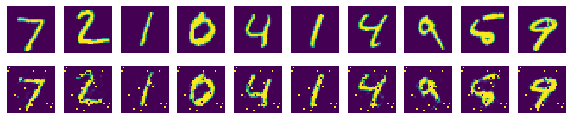

In [23]:
# 위쪽엔 입력값 이미지
# 아래쪽엔 신경망 생성 이미지

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
    
plt.show()